In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, chi2_contingency, chi2
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
import time
from imblearn.over_sampling import RandomOverSampler
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, recall_score, precision_score, classification_report

In [2]:
df = pd.read_csv('brain_stroke.csv')
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [3]:
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [4]:
df.loc[ df['age'] <= 25, 'age'] = 0
df.loc[(df['age'] > 25) & (df['age'] <= 39), 'age'] = 1
df.loc[(df['age'] > 39) & (df['age'] <= 59), 'age'] = 2
df.loc[ df['age'] > 59, 'age'] = 3

In [5]:
df.loc[ df['bmi'] <= 23, 'bmi'] = 0
df.loc[(df['bmi'] > 23) & (df['bmi'] <= 28), 'bmi'] = 1
df.loc[(df['bmi'] > 28) & (df['bmi'] <= 32), 'bmi'] = 2
df.loc[ df['bmi'] > 32, 'bmi'] = 3

In [6]:
df.loc[ df['avg_glucose_level'] <= 50, 'avg_glucose_level'] = 0
df.loc[(df['avg_glucose_level'] > 50) & (df['avg_glucose_level'] <= 100), 'avg_glucose_level'] = 1
df.loc[(df['avg_glucose_level'] > 100) & (df['avg_glucose_level'] <= 150), 'avg_glucose_level'] = 2
df.loc[(df['avg_glucose_level'] > 150) & (df['avg_glucose_level'] <= 200), 'avg_glucose_level'] = 3
df.loc[ df['avg_glucose_level'] > 200, 'avg_glucose_level'] = 4

In [7]:
def to_numerical(feature: str):
    mapping = {}
    labels = df[feature].unique()
    for x, y in zip(labels, range(len(labels))):
        mapping[x] = y
    df[feature] = df[feature].map(mapping)

In [8]:
string_features = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
for feature in string_features:
    to_numerical(feature)

In [10]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,3.0,0,1,0,0,0,4.0,3.0,0,1
1,0,3.0,0,1,0,0,1,2.0,3.0,1,1
2,1,2.0,0,0,0,0,0,3.0,3.0,2,1
3,1,3.0,1,0,0,1,1,3.0,1.0,1,1
4,0,3.0,0,0,0,0,0,3.0,2.0,0,1


In [12]:
X = df.drop('stroke',axis=1)
y = df.stroke

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [14]:
ohe = OneHotEncoder()
X = ohe.fit_transform(X)

In [15]:
ss = StandardScaler(with_mean=False)
X = ss.fit_transform(X)

In [16]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [17]:
X_train.shape

(3984, 30)

### we can see the data is imbalance

In [18]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

Before OverSampling, counts of label '1': 194
Before OverSampling, counts of label '0': 3790 



# SMOTE is used to oversample the imabalnce data

In [19]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

In [20]:
X_test_res, y_test_res = sm.fit_resample(X_test, y_test.ravel())

In [21]:
X_test.shape

(997, 30)

In [22]:
X_test_res.shape

(1886, 30)

In [49]:
# after oversampling the imbalnce data

In [23]:
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

After OverSampling, the shape of train_X: (7580, 30)
After OverSampling, the shape of train_y: (7580,) 

After OverSampling, counts of label '1': 3790
After OverSampling, counts of label '0': 3790


# random forest

In [24]:
rf_c = RandomForestClassifier()
rf_c.fit(X_train, y_train)
rf_c.score(X_test, y_test)

0.9327983951855566

In [44]:
rf=rf_c.score(X_test, y_test)

In [25]:
predictions=rf_c.predict(X_test)

In [26]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       943
           1       0.00      0.00      0.00        54

    accuracy                           0.93       997
   macro avg       0.47      0.49      0.48       997
weighted avg       0.89      0.93      0.91       997



# svm

In [28]:
svc = SVC()
svc.fit(X_train, y_train)
svc.score(X_test, y_test)

0.9458375125376128

In [43]:
svm=svc.score(X_test, y_test)

In [30]:
print(classification_report(y_test,svc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       943
           1       0.00      0.00      0.00        54

    accuracy                           0.95       997
   macro avg       0.47      0.50      0.49       997
weighted avg       0.89      0.95      0.92       997



c:\Users\KIRUBA KARAN\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\KIRUBA KARAN\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\KIRUBA KARAN\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# knn

In [32]:
knc = KNeighborsClassifier()
knc.fit(X_train, y_train)
knc.score(X_test, y_test)

0.9398194583751254

In [42]:
knn=knc.score(X_test, y_test)

In [33]:
print(classification_report(y_test,knc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       943
           1       0.00      0.00      0.00        54

    accuracy                           0.94       997
   macro avg       0.47      0.50      0.48       997
weighted avg       0.89      0.94      0.92       997



# decision tree

In [35]:
classifier = DecisionTreeClassifier(criterion='entropy',random_state=0) 
classifier.fit(X_train,y_train)
classifier.score(X_test, y_test)

0.9187562688064193

In [41]:
dt=classifier.score(X_test, y_test)

In [36]:
print(classification_report(y_test, classifier.predict(X_test)))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       943
           1       0.06      0.04      0.05        54

    accuracy                           0.92       997
   macro avg       0.51      0.50      0.50       997
weighted avg       0.90      0.92      0.91       997



# logistic regression

In [37]:
logr =LogisticRegression()
logr.fit(X_train,y_train)
logr.score(X_test, y_test)

0.9458375125376128

In [40]:
lo=logr.score(X_test, y_test)

In [39]:
print(classification_report(y_test, logr.predict(X_test)))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       943
           1       0.00      0.00      0.00        54

    accuracy                           0.95       997
   macro avg       0.47      0.50      0.49       997
weighted avg       0.89      0.95      0.92       997



c:\Users\KIRUBA KARAN\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\KIRUBA KARAN\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\KIRUBA KARAN\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


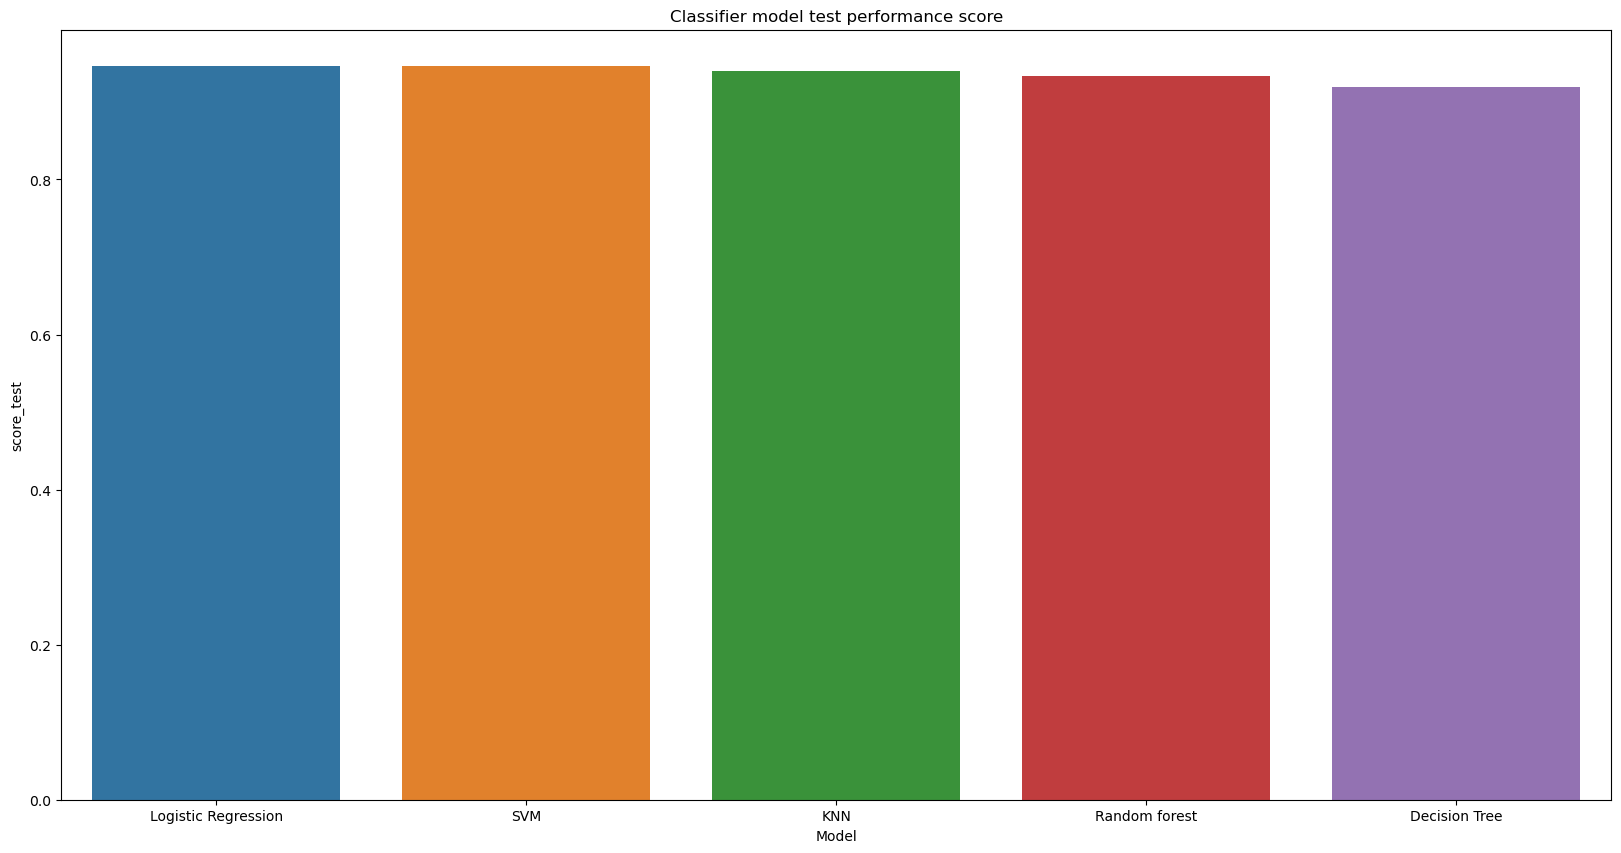

In [48]:
model_score= pd.DataFrame({
     'Model' : ['Logistic Regression', 'Decision Tree','Random forest','SVM', 'KNN'],
     'score_test' : [lo,dt,rf,svm,knn]})

model_score=model_score.sort_values(by = 'score_test', ascending = False)

plt.figure(figsize = (20, 10))

sns.barplot(x = 'Model', y = 'score_test', data = model_score)

plt.title('Classifier model test performance score')

plt.show()

# from above results we came to conclusion that logistic regression perform well for predicting brain stroke